# 1: Data Collection and Cleaning
## Function Cataglog
1. From pandas:
    - `pd.read_excel()` for .xlsx file
    - `df.head()` to display first 5 rows in dataframe
    - `df.isnull()` return boolean of whether each cell is NAN
        - related functions: `df.dropna()`
    - `df.sum()` sums across axis specified, `axis = None` == `axis = 0` by default ie. down the rows
    - `df.drop()` drops rows or columns specified across axis
    - `df.dtypes` returns a series with data types of each column
    - `df.value_counts()` returns a series containing counts of unique values
    - `df.replace()` replaces specified values with other given values
    - `df.to_numeric()` converts inputs to numeric data type, `error = coerce` returns NAN where conversion is not possible

## Read In Data

In [7]:
# read in data 
# data source: https://www.theramenrater.com/resources-2/the-list/
import pandas as pd
df = pd.read_excel("thebiglist.xlsx")
df.head() # insight: have 3702 data points

,Review #,Brand,Variety,Style,Country,Stars,T
0,3702,Higashimaru,Seafood Sara Udon,Pack,Japan,5,NaN
1,3701,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,NaN
2,3700,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5,NaN
3,3699,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,NaN
4,3698,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,NaN


## Identify Missing Data & Remove Unnecessary Information

In [13]:
# check for missing data
df.isnull().sum()

Brand      0
Variety    0
Style      0
Country    0
Stars      0
dtype: int64

In [9]:
# drop column that are not informative
df = df.drop(["Review #", "T"], axis = 1)
df.head()

,Brand,Variety,Style,Country,Stars
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5


## Standardize/Clean Data Types

In [15]:
# checking dataframe dtypes
df.dtypes # insight: object dtype == string, but Stars should be a float

Brand      object
Variety    object
Style      object
Country    object
Stars      object
dtype: object

In [16]:
# acquire unique values
df["Stars"].value_counts()

5                      667
3.5                    543
3.75                   535
4                      439
4.5                    242
3.25                   222
4.25                   215
3                      172
2.75                   110
2                       95
4.75                    93
2.5                     93
1.5                     50
0                       40
1                       38
2.25                    29
1.75                    28
0.5                     20
0.25                    17
1.25                    14
Unrated                  3
NR                       3
2.9                      2
4.125                    2
3.1                      2
0.75                     2
2.8                      2
1.1                      2
4.25/5                   2
3.7                      1
2.85                     1
3.4                      1
3.6                      1
2.3                      1
3.2                      1
3.65                     1
0.1                      1
2

In [17]:
# clean inputs data
df["Stars"] = df["Stars"].replace("4.25/5", 4.25)
df["Stars"] = df["Stars"].replace("5/2.5", 2.5)
df["Stars"] = df["Stars"].replace("4.5/5", 4.5)
df["Stars"] = df["Stars"].replace("3.5/2.5", 2.5)
# convert strings that cannot be converted to numeric type to NAN
df["Stars"] = pd.to_numeric(df["Stars"], errors = "coerce")
# drop rows with NAN
df = df.dropna()
# inspect changes made
df.isnull().sum()

Brand      0
Variety    0
Style      0
Country    0
Stars      0
dtype: int64

# 2: Feature Extraction, Data Visualization & Statistics
## Function Catalog
1. From string
    - `" ".join()` joins strings provided into 1 string with `" "` between every string
    - `str.lower()` converts all alphabet in str to lower case
    - `string.punctuation` returns a list of punctuations
2. From nltk
    - `nltk.tokenize.word_tokenize()` tokenizes string provided
3. From collectionns
    - `collections.Counter()` returns a dictionary containing unique words as key and counts as value
    - `dict.most_common()` sieves out key with n greatest values
4. From pandas
    - `df["Column with string inputs"].str.lower()` lower all strings in series 
    - `df["New column's name"] = List` creates new column
    - `df.mean()`
    - `df.median()`
5. From matplot or seaborn:
    - `plt.hist(x)` returns histogram
    - `fig, axs = plt.subplots(ncols = 4, figsize = (25, 8))` sets up for multiple plots
    - `axs[0].barh(x, y)` creates a horizontal bar graph, notice this syntax is for matplot
    - `axs[1].bar(x, y)`
    - `sns.boxplot(x, y, order = z, showfliers = False, ax = axs[2])` syntax for sns
    - `sns.distplot(x, color = "blue", ax = axs[3])` distplots can overlap when cmd is repeated
    - `axs[3].tick_params(axis = "x", rotation = 90)` this syntax to alter settings for axis is valid for both matlab and sns
6. Inbuilt functions:
    - `any()` returns true if any element of a given iterable is true, else returns false
    - `list.append(item)` appends item to list

## Prepare Data for Model

In [26]:
# import more dependencies
import string
import collections
import nltk

# data preparation
# variety - contain info about flavour and type of ramen
variety = df["Variety"]
variety_text = " ".join(variety) # join everything into a single string
variety_text = variety_text.lower() # lower case
punct_list = list(string.punctuation)
variety_text = "".join([char for char in variety_text if char not in punct_list]) # rm punct
variety_tokens = nltk.tokenize.word_tokenize(variety_text) # tokenize
variety_counter = collections.Counter(variety_tokens) # return dict 
variety_counter.most_common(50) # 20 most common type of ramen

[('noodles', 889),
 ('noodle', 762),
 ('ramen', 630),
 ('instant', 560),
 ('flavour', 517),
 ('flavor', 491),
 ('chicken', 419),
 ('spicy', 413),
 ('soup', 314),
 ('beef', 314),
 ('cup', 252),
 ('with', 224),
 ('sauce', 211),
 ('curry', 188),
 ('hot', 187),
 ('rice', 178),
 ('tom', 152),
 ('shrimp', 151),
 ('artificial', 149),
 ('mi', 142),
 ('seafood', 140),
 ('pork', 140),
 ('bowl', 138),
 ('udon', 124),
 ('style', 122),
 ('tonkotsu', 108),
 ('yum', 107),
 ('yakisoba', 99),
 ('goreng', 96),
 ('sesame', 89),
 ('vermicelli', 85),
 ('miso', 81),
 ('shoyu', 77),
 ('oriental', 71),
 ('vegetable', 71),
 ('soy', 70),
 ('kimchi', 68),
 ('demae', 67),
 ('penang', 66),
 ('vegetarian', 61),
 ('mushroom', 61),
 ('sour', 59),
 ('big', 58),
 ('chili', 58),
 ('black', 56),
 ('fried', 56),
 ('oil', 54),
 ('rasa', 52),
 ('sabor', 52),
 ('ramyun', 52)]

## Feature Extraction

In [28]:
# feature extraction from variety column
# keywords to identify features in text are decided from most_common list
is_spicy = []
hot_flavour = ["spicy", "curry", "kari", "hot", "tom", "chili", "chilli", "pedas", "laksa"]
# list ref variety_counter.most_common()
for variety in df["Variety"].str.lower():
    if any(flavour in variety for flavour in hot_flavour):
        is_spicy.append(1)
    else:
        is_spicy.append(0)
df["isSpicy"] = is_spicy

has_chicken = []
for variety in df["Variety"].str.lower():
    if ("chicken" in variety) or ("ayam" in variety):
        has_chicken.append(1)
    else:
        has_chicken.append(0)
df["hasChicken"] = has_chicken

has_beef = []
for variety in df["Variety"].str.lower():
    if ("beef" in variety) or ("cow" in variety):
        has_beef.append(1)
    else:
        has_beef.append(0)
df["hasBeef"] = has_beef

is_seafood = []
seafood_flavour = ["seafood", "fish", "shrimp", "crab", "prawn"]
for variety in df["Variety"].str.lower():
    if any(flavour in variety for flavour in seafood_flavour):
        is_seafood.append(1)
    else:
        is_seafood.append(0)
df["isSeafood"] = is_seafood

# display current df
df.head()

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,isSeafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0


## Exploration and Data Analysis

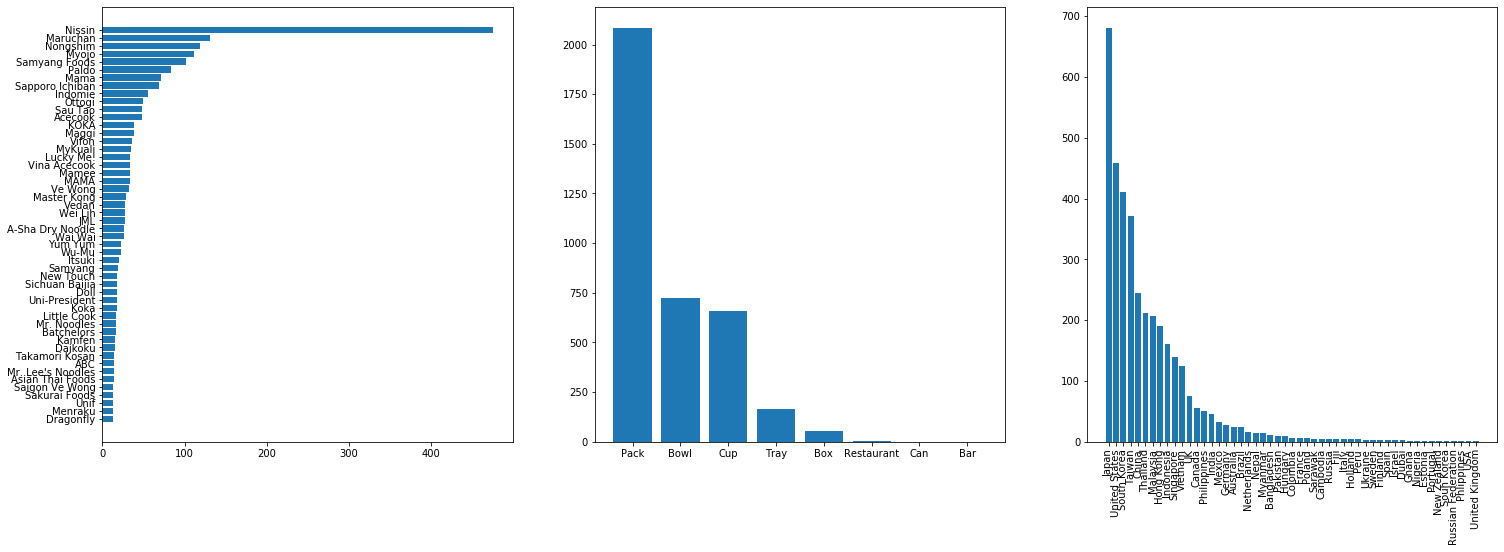

In [61]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# explore brand
brand_count = df["Brand"].value_counts()[:50] # top 50
# explore style
style_count = df["Style"].value_counts() # which style is most liked
# explore country
country_count = df["Country"].value_counts() # which country produces most types of ramen

# plot figures
fig, axs = plt.subplots(ncols = 3, figsize = (25, 8))
axs[0].barh(brand_count.sort_values(ascending = True).index, brand_count.sort_values(ascending = True))
# plt.xticks(rotation = 90)
axs[1].bar(style_count.index, style_count)
axs[2].bar(country_count.index, country_count)
axs[2].tick_params(axis = "x", rotation = 90)

3.75

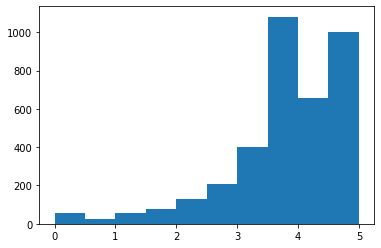

In [41]:
# examine distribution of scores in stars
plt.hist(df["Stars"]) # insight: heavily skewd, not normally distribution
df["Stars"].mean() # 3.722
df["Stars"].median() # 3.75

C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resu

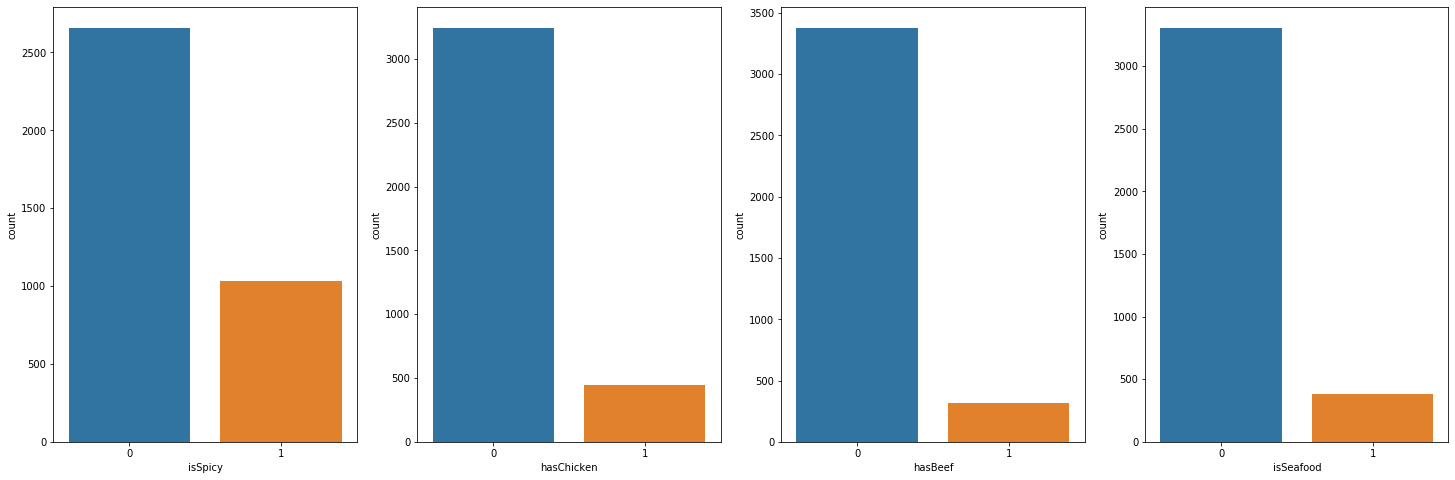

In [43]:
# glimpse proportion of ramen with specific feature extracted
fig, axs = plt.subplots(ncols = 4, figsize = (25, 8))
sns.countplot(df["isSpicy"], ax = axs[0])
sns.countplot(df["hasChicken"], ax = axs[1])
sns.countplot(df["hasBeef"], ax = axs[2])
sns.countplot(df["isSeafood"], ax = axs[3])

C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword 

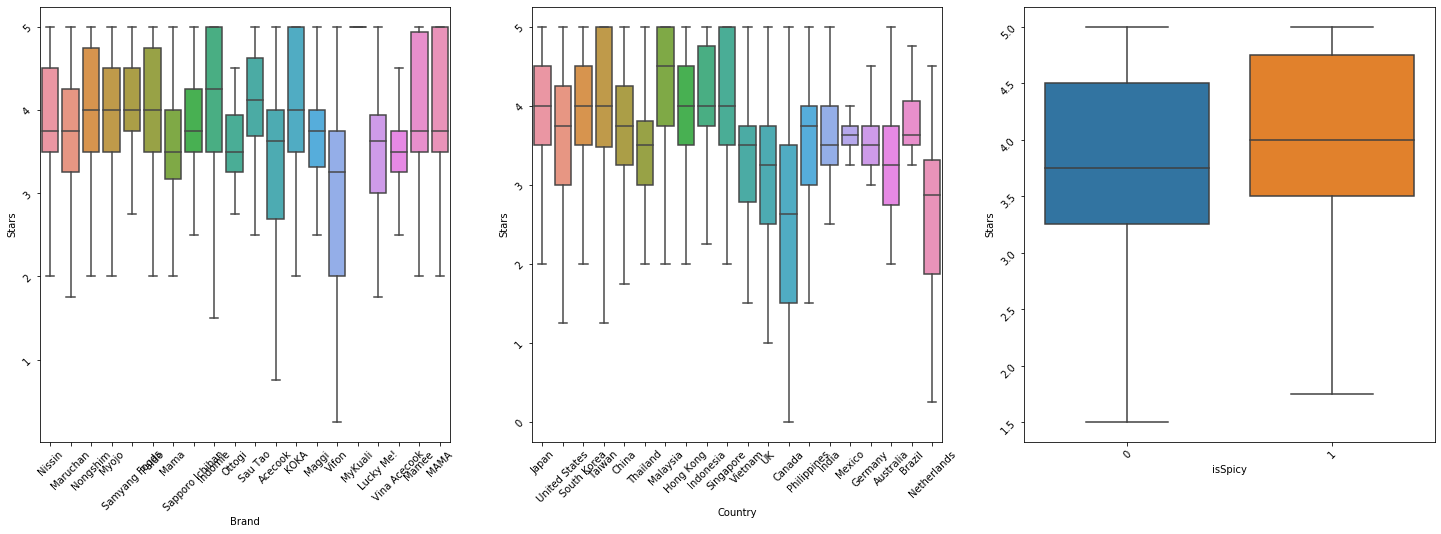

In [49]:
# which has better star ratings
fig, axs = plt.subplots(ncols = 3, figsize = (25, 8))

# which brand has the highest stars
sns.boxplot(df["Brand"], df["Stars"], order = brand_count.index[:20], showfliers = False , ax = axs[0])
# order shows boxplot of what is specified only
# showfliers = False imply dont show outliers
axs[0].tick_params(rotation = 45)
 
# which country has the highest stars
sns.boxplot(df["Country"], df["Stars"], order = country_count.index[:20], showfliers = False, ax = axs[1]) 
axs[1].tick_params(rotation = 45)

# which noodle has higher stars, spicy or non spicy
sns.boxplot(df["isSpicy"], df["Stars"], showfliers = False, ax = axs[2])
axs[2].tick_params(rotation = 45)

## Statistics

3.845135527589545
3.675112824370064
4.0
3.75


C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


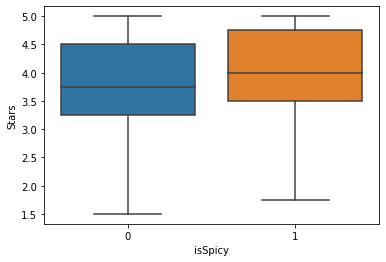

In [56]:
# evaluate spicy and non spicy data separately
spicy_df = df[df["isSpicy"] == 1]
nonspicy_df = df[df["isSpicy"] == 0]
print(spicy_df["Stars"].mean())
print(nonspicy_df["Stars"].mean())
print(spicy_df["Stars"].median())
print(nonspicy_df["Stars"].median())
sns.boxplot(df["isSpicy"], df["Stars"], showfliers = False)
# insight: scpicy ramen seem to have better rating
# how do we know the diff in their stars rating is statistically significant?

C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\User

MannwhitneyuResult(statistic=1220814.5, pvalue=6.244898720575498e-08)

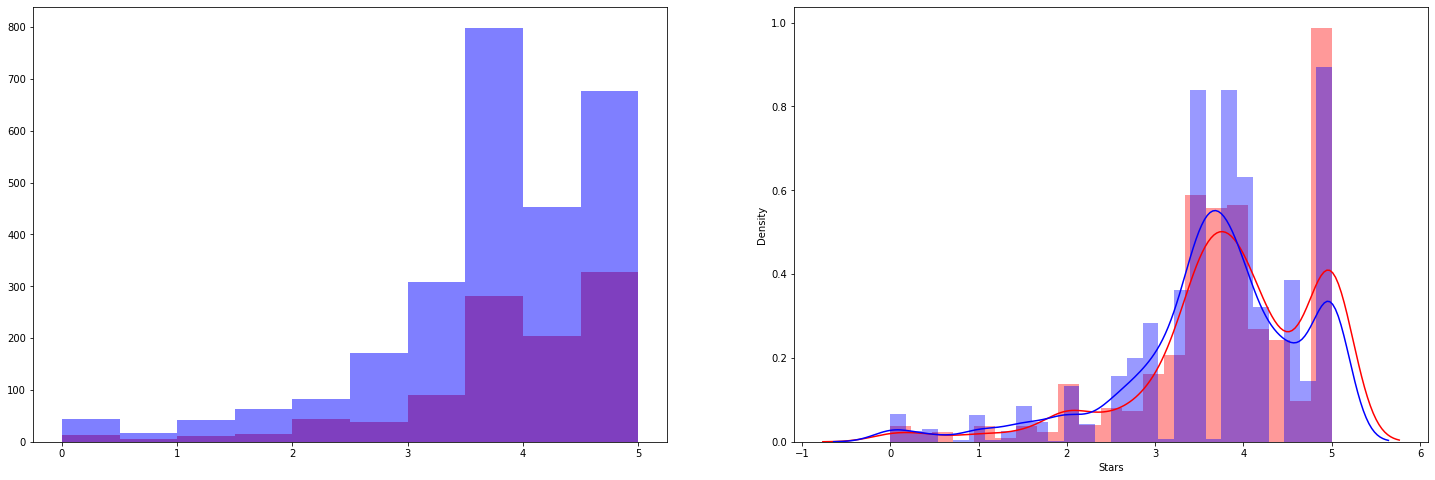

In [54]:
fig, axs = plt.subplots(ncols = 2, figsize = (25, 8))
# without scaling them against each other
axs[0].hist(spicy_df["Stars"], alpha = 0.5, color = "red")
axs[0].hist(nonspicy_df["Stars"], alpha = 0.5, color = "blue")
# scaling numbers
sns.distplot(spicy_df["Stars"], color = "red", ax = axs[1])
sns.distplot(nonspicy_df["Stars"], color = "blue", ax = axs[1])

# either ways we can see they are not normally distributed so to know stat sig, 
# we need mann-whitney u test
from scipy.stats import mannwhitneyu
mannwhitneyu(spicy_df["Stars"], nonspicy_df["Stars"])
# insight: small p-value ie their diff in rating is significant

C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy arra

MannwhitneyuResult(statistic=626226.5, pvalue=0.298820092010756)

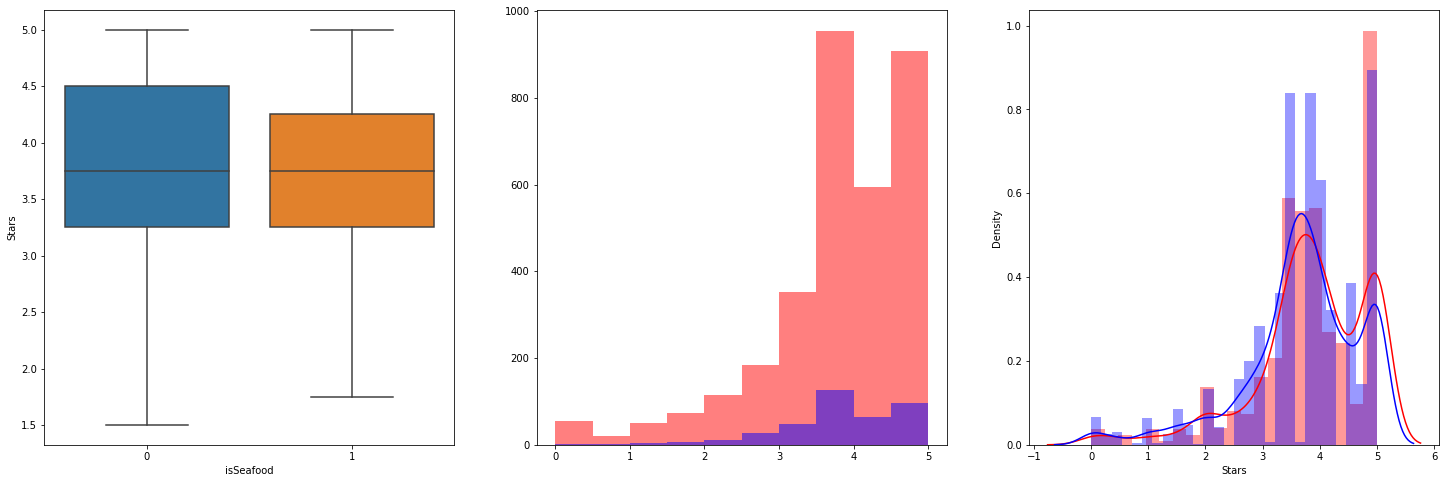

In [60]:
# can do the same for other featuers eg.
fig, axs = plt.subplots(ncols = 3, figsize = (25, 8))
sns.boxplot(df["isSeafood"], df["Stars"], showfliers = False, ax = axs[0])
# without scaling them against each other
axs[1].hist(df[df["isSeafood"] == 0]["Stars"], alpha = 0.5, color = "red")
axs[1].hist(df[df["isSeafood"] == 1]["Stars"], alpha = 0.5, color = "blue")
# scaling numbers
sns.distplot(spicy_df["Stars"], color = "red", ax = axs[2])
sns.distplot(nonspicy_df["Stars"], color = "blue", ax = axs[2])
# is their difference in rating significant?
mannwhitneyu(df[df["isSeafood"] == 0]["Stars"], df[df["isSeafood"] == 1]["Stars"])

# 3: Feature Engineering & Data Preparation
## Function Catalog
1. From Pandas:
    - `pd.get_dummies()` converts categorical variables into dummy/indicator variables
    - `pd.concat()` concatanate items given along axis specified

## Group Less Informative Categories

In [66]:
# group those outside of top n threshold as Others
# we will be representing these features in some sort of one-hot format
# with this in mind, we should not have too many categories within each features (sparse data)

# brand
top_30_brands = df["Brand"].value_counts().index[:30]
new_brand = []
for brand in df["Brand"]:
    if brand in top_30_brands:
        new_brand.append(brand)
    else:
        new_brand.append("Other")
df["newBrand"] = new_brand
# style
top_4_style = df["Style"].value_counts().index[:4]
new_style = []
for style in df["Style"]:
    if style in top_4_style:
        new_style.append(style)
    else:
        new_style.append("Other")
df["newStyle"] = new_style
# country
top_10_countries = df["Country"].value_counts().index[:10]
new_country = []
for country in df["Country"]:
    if country in top_10_countries:
        new_country.append(country)
    else:
        new_country.append("Other")
df["newCountry"] = new_country

## Format Data

In [67]:
# convert feature to some sort of one-hot
brand_dummy = pd.get_dummies(df["newBrand"], drop_first = True, prefix = "from")
style_dummy = pd.get_dummies(df["newStyle"], drop_first = True, prefix = "is")
country_dummy = pd.get_dummies(df["newCountry"], drop_first = True, prefix = "in")
country_dummy

,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3697,0,0,0,0,1,0,0,0,0,0
3698,0,0,0,0,0,0,0,0,1,0
3699,0,0,0,0,0,0,0,0,1,0
3700,0,0,0,0,0,0,0,0,1,0


In [72]:
# drop unnecessary columns
df = df.drop(["Brand", "Variety", "Style", "Country", "newBrand", "newStyle", "newCountry"], axis = 1)
df = pd.concat([df, brand_dummy, style_dummy, country_dummy], axis = 1)
df.head()

,Stars,isSpicy,hasChicken,hasBeef,isSeafood,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,...,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States
0,5.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4.5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# 4: Machine Learning Model Training
## Function Catalog
1. From Pandas:
    - `pd.qcut(series, q = 2, labels = [0,1])` is a quantile-based discretion function
    - `series.sort_values("column name", ascending = False)`sorts a series based on a variable specified
2. From Sklearn:
    - `x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)` stratify helps split the train and test set more evenly based on specified variable, in this case, y
    - `.fit`, `.predict`, `confusion_matrix()`, `classification_report()` important functions for modelling

## Prepare Model Inputs

In [74]:
# import dependencies
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [76]:
# change stars column into a categorical data (rather than continuous)
# how many category to split, where is the threshold (mean? median? etc)
df["binStars"] = pd.qcut(df["Stars"], q = 2, labels = [0,1])

In [77]:
# prepare dataset 
x = df.drop(["binStars", "Stars"], axis = 1)
y = df["binStars"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)
# stratify help distribute samples more evenly wrt to y

## Models

In [80]:
# baseline DummyClassifier
dummy = DummyClassifier()
dummy.fit(x_train, y_train)
dummy_pred = dummy.predict(x_test)

# assess DummyClassifier
print(confusion_matrix(y_test, dummy_pred))
print(classification_report(y_test, dummy_pred))

[[230 177]
 [173 159]]
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       407
           1       0.47      0.48      0.48       332

    accuracy                           0.53       739
   macro avg       0.52      0.52      0.52       739
weighted avg       0.53      0.53      0.53       739



C:\Users\20jam\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [90]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)

# assess Logistic Regression
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

# best performing model
# use coefficient found by model to judge importance of every feature in classification
logreg_feature = pd.DataFrame({"feature": x.columns, "importance":logreg.coef_[0]})
logreg_feature.sort_values("importance", ascending = False)

[[280 127]
 [124 208]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       407
           1       0.62      0.63      0.62       332

    accuracy                           0.66       739
   macro avg       0.66      0.66      0.66       739
weighted avg       0.66      0.66      0.66       739



,feature,importance
16,from_MyKuali,2.142164
35,is_Other,1.206093
39,in_Indonesia,1.041216
19,from_Nongshim,0.760069
40,in_Japan,0.759209
43,in_Singapore,0.745061
45,in_Taiwan,0.731659
15,from_Master Kong,0.707680
23,from_Samyang Foods,0.690557
41,in_Malaysia,0.600286


In [94]:
# baseline Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)

# assess Decision Tree Classifier
print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

# use coefficient found by model to judge importance of every feature in classification
tree_feature = pd.DataFrame({"feature": x.columns, "importance": tree.feature_importances_})
tree_feature.sort_values("importance", ascending = False)

[[260 147]
 [117 215]]
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       407
           1       0.59      0.65      0.62       332

    accuracy                           0.64       739
   macro avg       0.64      0.64      0.64       739
weighted avg       0.65      0.64      0.64       739



,feature,importance
42,in_Other,0.156637
0,isSpicy,0.100127
36,is_Pack,0.068126
3,isSeafood,0.054620
46,in_Thailand,0.049879
1,hasChicken,0.048153
34,is_Cup,0.044982
2,hasBeef,0.041311
20,from_Other,0.030265
16,from_MyKuali,0.026364


In [93]:
# Random Forest Classifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)

# assess Random Forest Classifier
print(confusion_matrix(y_test, forest_pred))
print(classification_report(y_test, forest_pred))

# use coefficient found by model to judge importance of every feature in classification
forest_feature = pd.DataFrame({"feature": x.columns, "importance": forest.feature_importances_})
forest_feature.sort_values("importance", ascending = False)

[[239 168]
 [108 224]]
              precision    recall  f1-score   support

           0       0.69      0.59      0.63       407
           1       0.57      0.67      0.62       332

    accuracy                           0.63       739
   macro avg       0.63      0.63      0.63       739
weighted avg       0.64      0.63      0.63       739



,feature,importance
42,in_Other,0.093265
0,isSpicy,0.090371
36,is_Pack,0.065671
3,isSeafood,0.063922
1,hasChicken,0.056931
34,is_Cup,0.053568
2,hasBeef,0.046476
20,from_Other,0.044513
18,from_Nissin,0.032478
47,in_United States,0.032062


# FIN
The project is completed with guidance from *[Intermediate] Project Ramen Rating Analysis* free course on UpLevelSG.

Areas of Improvements:
- How to choose threshold to group feature's categories into "Others" less arbitrarily or with support of literary reviews
- Research on optimum number of bins and threshold for each bin for "binStars"
- Explore other categorization model

Other resources:
- <https://www.markdownguide.org/basic-syntax/>